<a href="https://colab.research.google.com/github/vangdale-krishna/radiology-report/blob/main/project_Shaheen_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Data preprocessing -Converting csv data into report

In [ ]:
import pandas as pd

# Load and inspect the reports CSV
reports_path = '/content/drive/MyDrive/XAI/reports.csv'
reports_df = pd.read_csv(reports_path)
reports_df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/XAI/reports.csv'

In [ ]:
images_path = '/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks'
reports_df['image_path'] = images_path + '/' + reports_df['Image_filename']
reports_df.head()

,CaseID,Image_filename,Mask_tumor_filename,Mask_other_filename,Pixel_size,Age,Tissue_composition,Signs,Symptoms,Shape,...,Posterior_features,Halo,Calcifications,Skin_thickening,Interpretation,BIRADS,Verification,Diagnosis,Classification,image_path
0,1,case001.png,case001_tumor.png,NaN,0.007812,57,heterogeneous: predominantly fat,breast scar,family history of breast/ovarian cancer,irregular,...,shadowing,no,no,yes,Breast scar (surgery)&Breast scar (radiotherapy),2,confirmed by follow-up care,not applicable,benign,/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case001.png
1,2,case002.png,case002_tumor.png,NaN,0.006462,not available,homogeneous: fat,not available,not available,oval,...,no,no,no,no,Dysplasia&Fibroadenoma,4b,confirmed by biopsy,Intramammary lymph node,benign,/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case002.png
2,3,case003.png,case003_tumor.png,NaN,0.006944,56,heterogeneous: predominantly fat,no,nipple discharge,oval,...,no,no,no,no,Duct filled with thick fluid&Intraductal papilloma,4a,confirmed by biopsy,Usual ductal hyperplasia (UDH)&Pseudoangiomatous stromal hyperplasia (PASH),benign,/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case003.png
3,4,case004.png,case004_tumor.png,NaN,0.007812,43,homogeneous: fibroglandular,no,no,round,...,no,no,no,no,Cyst filled with thick fluid,3,confirmed by follow-up care,not applicable,benign,/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case004.png
4,5,case005.png,case005_tumor.png,NaN,0.007812,67,homogeneous: fat,nipple retraction&palpable,family history of breast/ovarian cancer,oval,...,enhancement,no,no,no,Suspicion of malignancy&Intraductal papilloma,4b,confirmed by biopsy,Encapsulated papillary carcinoma&Ductal carcinoma in situ (DCIS),malignant,/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case005.png


**Text Columns:** Extract the relevant columns needed for generating the reports, such as  Shape, Tissue composition and Interpretation.


In [ ]:
#def convert_to_text(row):
    # Create a natural language description of the input data
    #input_text = f"Patient is {row['Age']} years old with tissue composition of {row['Tissue_composition']}. " \
                 #f"Symptoms include {row['Signs']} and {row['Symptoms']}. Shape of the lesion is {row['Shape']}, " \
                 #f"with margin {row['Margin']}, echogenicity {row['Echogenicity']}, and posterior features {row['Posterior_features']}."
    #return input_text, row['Interpretation']

#reports_df['input_text'], reports_df['target_text'] = zip(*reports_df.apply(convert_to_text, axis=1))

In [ ]:
# create sentence using these features
def convert_to_text(row):
    input_text = f"The tissue composition is {row['Tissue_composition']} with a shape described as {row['Shape']}," \
                 f"  and interpretation : {row['Interpretation']}."
    return input_text

reports_df['input_text'] = reports_df.apply(convert_to_text, axis=1)

In [ ]:
reports_df = reports_df[['CaseID','input_text', 'image_path']]

In [ ]:
# Save the merged DataFrame to a CSV file
reports_df.to_csv('//content/drive/MyDrive/XAI/new_dataset.csv', index=False)
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('//content/drive/MyDrive/XAI/new_dataset.csv')
df.sample(5)

,CaseID,input_text,image_path
82,83,"The tissue composition is heterogeneous: predominantly fibroglandular with a shape described as irregular, and interpretation : Dysplasia.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case083.png
181,182,"The tissue composition is heterogeneous: predominantly fibroglandular with a shape described as round, and interpretation : Suspicion of malignancy&Dysplasia&Fibroadenoma&Intraductal papilloma&Phyllodes tumor.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case182.png
169,170,"The tissue composition is heterogeneous: predominantly fat with a shape described as irregular, and interpretation : Suspicion of malignancy.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case170.png
29,30,"The tissue composition is heterogeneous: predominantly fibroglandular with a shape described as oval, and interpretation : Complex cyst / Non-simple cyst.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case030.png
188,189,"The tissue composition is heterogeneous: predominantly fat with a shape described as oval, and interpretation : Suspicion of malignancy&Dysplasia&Intraductal papilloma.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case189.png


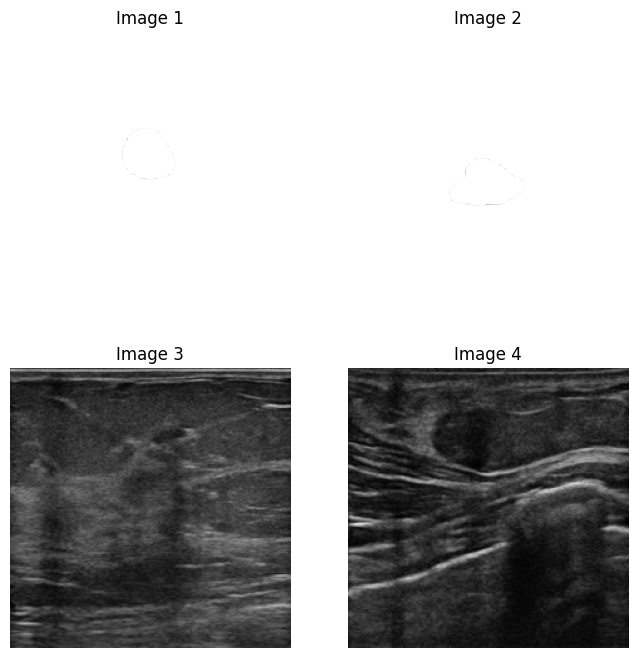

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder containing images
image_folder =  '/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks'
IMAGE_SIZE = (224, 224)
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
random_images = random.sample(image_files, 4)
plt.figure(figsize=(8, 8))

for i, image_file in enumerate(random_images):
    img_path = os.path.join(image_folder, image_file)
    img = Image.open(img_path)
    img = img.resize(IMAGE_SIZE)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i + 1}')

plt.show()


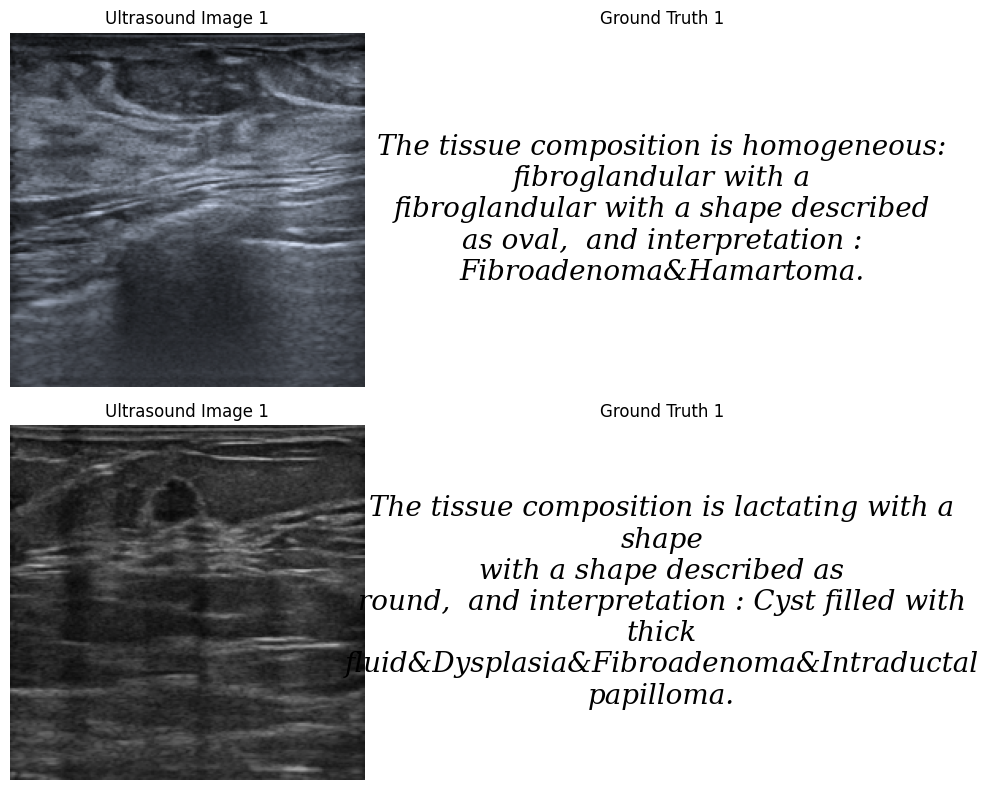

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
reports_df = pd.read_csv('/content/drive/MyDrive/XAI/new_dataset.csv')

def display_images_and_text(index1, index2):
    # Read images and texts
    image_path1 = reports_df.loc[index1, 'image_path']
    text1 = reports_df.loc[index1, 'input_text']
    image_path2 = reports_df.loc[index2, 'image_path']
    text2 = reports_df.loc[index2, 'input_text']
    text1 = " ".join(text1.split(' ')[:8]) + '\n' + " ".join(text1.split(' ')[5:10]) + '\n' + " ".join(text1.split(' ')[10:])
    text2 = " ".join(text2.split(' ')[:8]) + '\n' + " ".join(text2.split(' ')[5:10]) + '\n' + " ".join(text2.split(' ')[10:])
    img1 = Image.open(image_path1).resize((224, 224))
    img2 = Image.open(image_path2).resize((224, 224))

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Display first image and text
    axes[0, 0].imshow(img1)
    axes[0, 0].axis('off')
    axes[0, 0].set_title('Ultrasound Image 1')

    axes[0, 1].text(0.5, 0.5, text1, fontsize=20, va='center', ha='center',
                    wrap=True, fontstyle='italic', fontfamily='serif')
    axes[0, 1].axis('off')
    axes[0, 1].set_title('Ground Truth 1')

    axes[1, 0].imshow(img2)
    axes[1, 0].axis('off')
    axes[1, 0].set_title('Ultrasound Image 1')
    axes[1, 1].text(0.5, 0.5, text2, fontsize=20, va='center', ha='center',
                    wrap=True, fontstyle='italic', fontfamily='serif')
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Ground Truth 1')
    plt.tight_layout()
    plt.show()

display_images_and_text(20, 30)



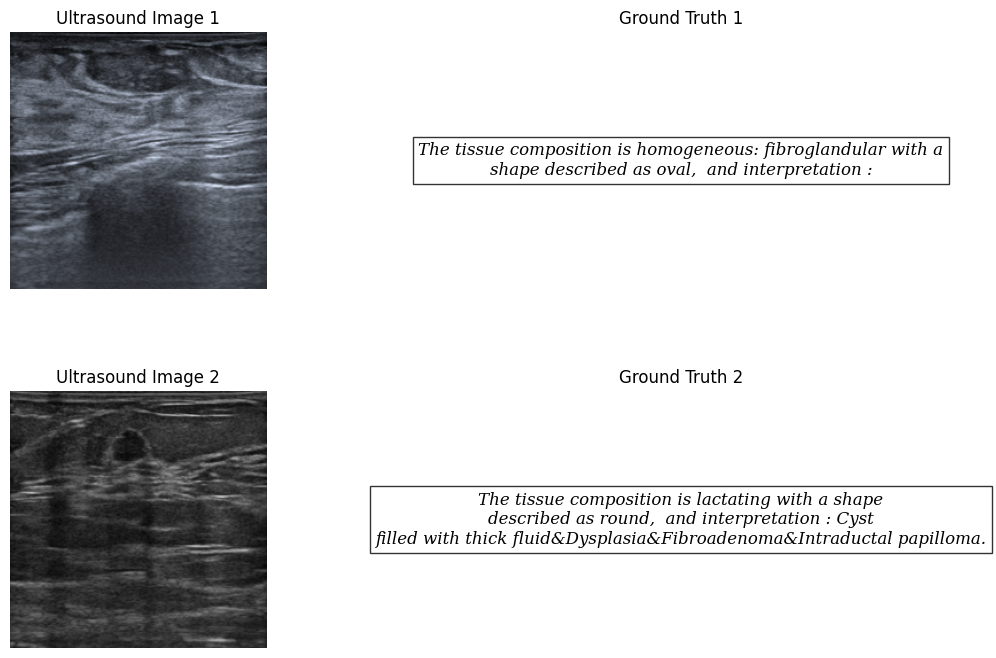

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the dataset
reports_df = pd.read_csv('/content/drive/MyDrive/XAI/new_dataset.csv')

def display_images_and_text(index1, index2):
    # Read images and texts
    image_path1 = reports_df.loc[index1, 'image_path']
    text1 = reports_df.loc[index1, 'input_text']
    image_path2 = reports_df.loc[index2, 'image_path']
    text2 = reports_df.loc[index2, 'input_text']

    # Adjust text to prevent overlap
    text1 = "\n".join([" ".join(text1.split(' ')[i:i+8]) for i in range(0, len(text1.split()), 8)])
    text2 = "\n".join([" ".join(text2.split(' ')[i:i+8]) for i in range(0, len(text2.split()), 8)])

    img1 = Image.open(image_path1).resize((224, 224))
    img2 = Image.open(image_path2).resize((224, 224))

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Display first image and text
    axes[0, 0].imshow(img1)
    axes[0, 0].axis('off')
    axes[0, 0].set_title('Ultrasound Image 1')

    axes[0, 1].text(0.5, 0.5, text1, fontsize=12, va='center', ha='center', wrap=True,
                    fontstyle='italic', fontfamily='serif', bbox=dict(facecolor='white', alpha=0.8))
    axes[0, 1].axis('off')
    axes[0, 1].set_title('Ground Truth 1')

    # Display second image and text
    axes[1, 0].imshow(img2)
    axes[1, 0].axis('off')
    axes[1, 0].set_title('Ultrasound Image 2')

    axes[1, 1].text(0.5, 0.5, text2, fontsize=12, va='center', ha='center', wrap=True,
                    fontstyle='italic', fontfamily='serif', bbox=dict(facecolor='white', alpha=0.8))
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Ground Truth 2')

    # Adjust layout to ensure no overlap
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()

# Display images and ground truth text for specific indices
display_images_and_text(20, 30)


# Report analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
df =  pd.read_csv('//content/drive/MyDrive/XAI/new_dataset.csv')
df.head(5)

,CaseID,input_text,image_path
0,1,"The tissue composition is heterogeneous: predominantly fat with a shape described as irregular, and interpretation : Breast scar (surgery)&Breast scar (radiotherapy).",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case001.png
1,2,"The tissue composition is homogeneous: fat with a shape described as oval, and interpretation : Dysplasia&Fibroadenoma.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case002.png
2,3,"The tissue composition is heterogeneous: predominantly fat with a shape described as oval, and interpretation : Duct filled with thick fluid&Intraductal papilloma.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case003.png
3,4,"The tissue composition is homogeneous: fibroglandular with a shape described as round, and interpretation : Cyst filled with thick fluid.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case004.png
4,5,"The tissue composition is homogeneous: fat with a shape described as oval, and interpretation : Suspicion of malignancy&Intraductal papilloma.",/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks/case005.png


In [ ]:
print(df['input_text'].count())
print("Number of Unique Reports:", df['input_text'].nunique())
print("Average Length of Reports:", df['input_text'].str.len().mean())

256
Number of Unique Reports: 139
Average Length of Reports: 152.4375


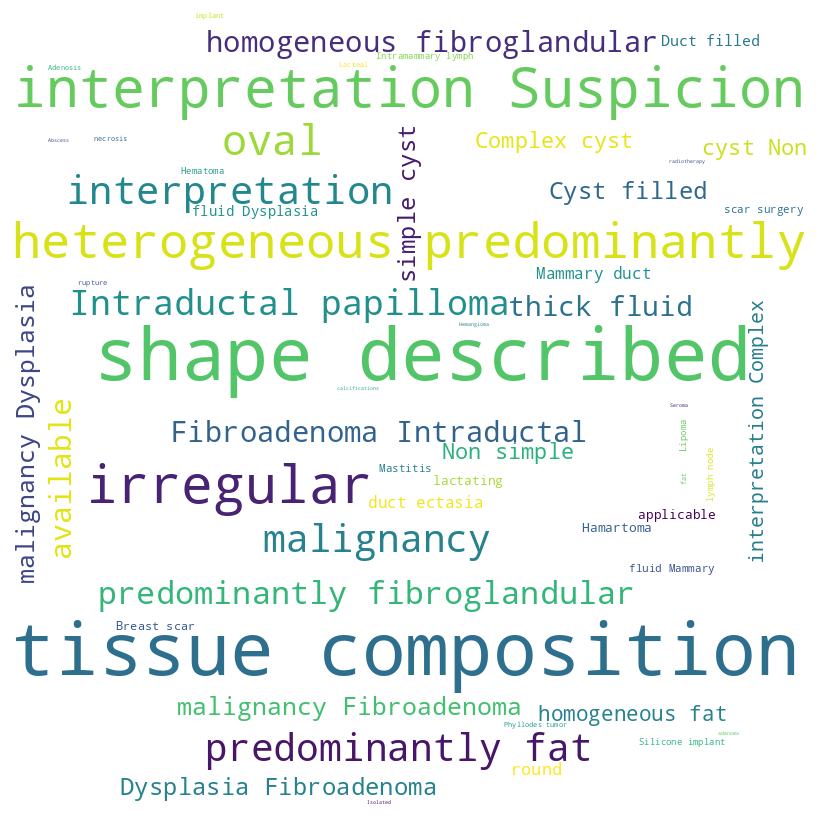

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

text = ' '.join(df['input_text'].dropna())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



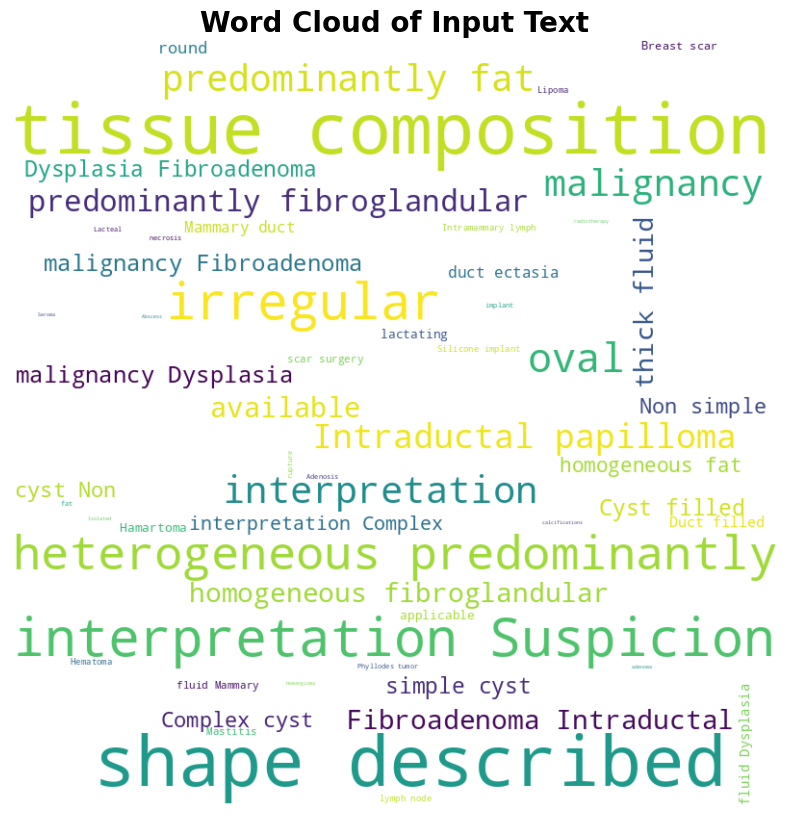

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Load the dataset (make sure to replace this with your actual DataFrame)
# df = pd.read_csv('/path/to/your/dataset.csv')

# Combine input text from the DataFrame
text = ' '.join(df['input_text'].dropna())

# Additional preprocessing: Remove stopwords and normalize text
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords=stopwords,
    max_words=200,  # Limit the maximum number of words to display
    colormap='viridis',  # Change colormap for better aesthetics
    contour_color='steelblue',  # Add a contour color for the word cloud
    contour_width=1,  # Width of the contour lines
).generate(text)

# Set up the matplotlib figure and aesthetics
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')  # Improved smoothing
plt.axis("off")

# Customize plot appearance with seaborn
sns.set_style("whitegrid")  # Optional: Set seaborn style
plt.title('Word Cloud of Input Text', fontsize=20, fontweight='bold')

# Display the word cloud
plt.tight_layout(pad=0)
plt.show()


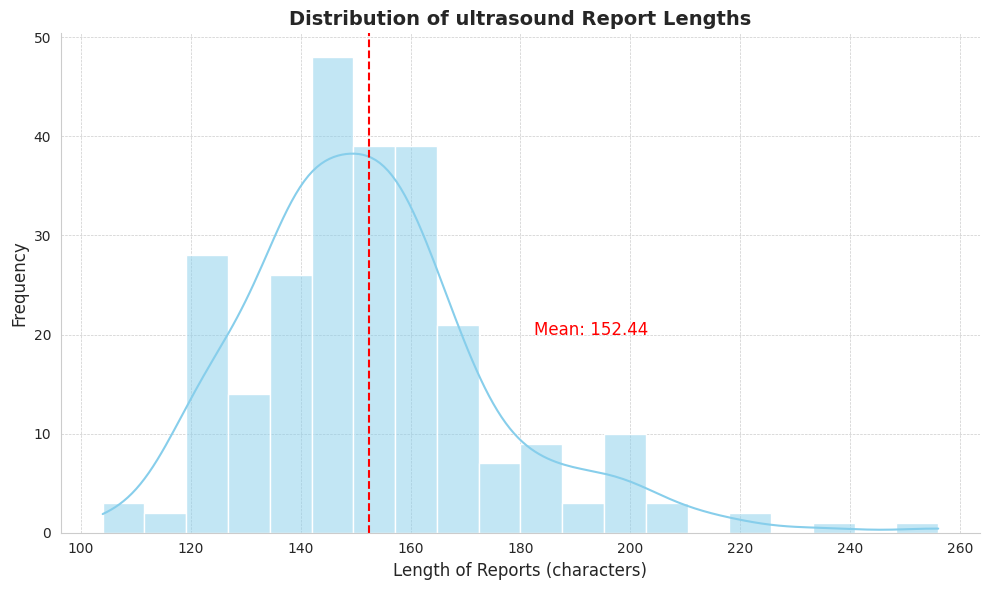

In [ ]:
df['report_length'] = df['input_text'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['report_length'], kde=True, color='skyblue')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.title('Distribution of ultrasound Report Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Length of Reports (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
mean_val = df['report_length'].mean()
plt.axvline(mean_val, color='red', linestyle='--')
plt.text(mean_val+30, 20, f'Mean: {mean_val:.2f}', color = 'red', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

# Training, Test and Validation dataset

In [ ]:
import csv
import os

# Path to your CSV file
filename = "/content/drive/MyDrive/XAI/new_dataset.csv"
IMAGES_PATH = "/content/drive/MyDrive/XAI/BrEaST-Lesions_USG-images_and_masks"
image_paths = []
captions = []
with open(filename, newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        img_name, caption = row['image_path'], row['input_text']
        img_name = img_name.split("#")[0]
        img_name = os.path.join(IMAGES_PATH, img_name.strip())
        tokens = caption.strip().split()
        if len(tokens) >= 2:
            caption = "<start> " + caption.strip() + " <end>"
            image_paths.append(img_name)
            captions.append(caption)

caption_mapping = {img_path: caption for img_path, caption in zip(image_paths, captions)}

In [ ]:
# @title Default title text
import numpy as np

train_size = 0.8
shuffle = True

all_images = list(caption_mapping.keys())

if shuffle:
  np.random.shuffle(all_images)

train_size = int(len(caption_mapping) * train_size)
train_data = {img_name: caption_mapping[img_name] for img_name in all_images[:train_size]}
valid_test_data = {img_name: caption_mapping[img_name] for img_name in all_images[train_size:]}

In [ ]:
train_size = int(len(valid_test_data) * 0.5)

all_images = list(valid_test_data.keys())

valid_data = {img_name: caption_mapping[img_name] for img_name in all_images[:train_size]}
test_data = {img_name: caption_mapping[img_name] for img_name in all_images[train_size:]}

In [ ]:
import numpy as np

train_split = 0.70
valid_split = 0.15
test_split = 0.15

shuffle = True

all_images = list(caption_mapping.keys())

if shuffle:
    np.random.shuffle(all_images)

total_samples = len(caption_mapping)
train_size = int(total_samples * train_split)
valid_size = int(total_samples * valid_split)
test_size = total_samples - train_size - valid_size

train_data = {img_name: caption_mapping[img_name] for img_name in all_images[:train_size]}
valid_data = {img_name: caption_mapping[img_name] for img_name in all_images[train_size:train_size + valid_size]}
test_data = {img_name: caption_mapping[img_name] for img_name in all_images[train_size + valid_size:]}


In [ ]:
# Join all the strings in the list into a single string
all_text = ' '.join(captions)
words = all_text.split()
unique_words = set(words)
num_unique_words = len(unique_words)

print("Number of unique words in the reports:", num_unique_words)

Number of unique words in the reports: 128


## Vectorizing the text data

We'll use the `TextVectorization` layer to vectorize the text data,
that is to say, to turn the
original strings into integer sequences where each integer represents the index of
a word in a vocabulary. We will use a custom string standardization scheme
(strip punctuation characters except `<` and `>`) and the default
splitting scheme (split on whitespace).

In [ ]:
# Desired image dimensions
IMAGE_SIZE = (224, 224)

# Vocabulary size
VOCAB_SIZE = 3000

# Fixed length allowed for any sequence
SEQ_LENGTH = 50

# Dimension for the image embeddings and token embeddings
EMBED_DIM = 512

# feed-forward network dimension
FF_DIM = 512

# Other training parameters
BATCH_SIZE = 32
EPOCHS = 30

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow import keras
from tensorflow.keras import layers
import re

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")

strip_chars = "!\"#$%&'()*+,-/:;<=>?@[\]^_`{|}~"
strip_chars = strip_chars.replace("<", "")
strip_chars = strip_chars.replace(">", "")
strip_chars = strip_chars.replace("xxxx", "")
vectorization = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LENGTH,
    standardize=custom_standardization,
)
vectorization.adapt(captions)


NameError: name 'captions' is not defined

## Building a `tf.data.Dataset` pipeline for training

Generate pairs of images and corresponding captions using a `tf.data.Dataset` object.


In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 32
def decode_and_resize(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img / 255.0
    return img


def process_input(img_path, captions):
    return decode_and_resize(img_path), vectorization(captions)


def make_dataset(images, captions):
    dataset = tf.data.Dataset.from_tensor_slices((images, captions))
    dataset = dataset.shuffle(BATCH_SIZE * 8)
    dataset = dataset.map(process_input, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    print(dataset)
    return dataset


# Pass the list of images and the list of corresponding captions
train_dataset = make_dataset(list(train_data.keys()), list(train_data.values()))
valid_dataset = make_dataset(list(valid_data.keys()), list(valid_data.values()))
test_dataset = make_dataset(list(test_data.keys()), list(test_data.values()))

# Optionally, you can print dataset information
print("Train Dataset:", train_dataset)
print("Validation Dataset:", valid_dataset)
print("Test Dataset:", test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>
Train Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>
Validation Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>
Test Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name

## Building the model
image captioning architecture consists of three models:

1. A CNN: used to extract the image features
2. A TransformerEncoder: The extracted image features are then passed to a Transformer based encoder that generates a new representation of the inputs
3. A TransformerDecoder: This model takes the encoder output and the text data
  (sequences) as inputs and tries to learn to generate the caption.

********

In [ ]:
image_augmentation = keras.Sequential(
    [
        layers.Resizing(224,224),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ]
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers

def get_cnn_model():
    base_model = ResNet101(
        input_shape=(224, 224, 3),
        include_top=False,
        weights="imagenet",
    )
    base_model.trainable = False
    base_model_out = base_model.output
    base_model_out = layers.Reshape((-1, base_model_out.shape[-1]))(base_model_out)
    cnn_model = tf.keras.models.Model(base_model.input, base_model_out)
    return cnn_model

In [ ]:
get_cnn_model().summary()

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 42,658,176 (162.73 MB)

In [ ]:
class TransformerEncoderBlock(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.0)
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.dense_1 = layers.Dense(embed_dim, activation="relu")

    def call(self, inputs, training, mask=None):
        inputs = self.layernorm_1(inputs)
        inputs = self.dense_1(inputs)
        attention_output_1 = self.attention_1(query=inputs, value=inputs, key=inputs, attention_mask=None, training=training,)
        out_1 = self.layernorm_2(inputs + attention_output_1)
        return out_1


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=embed_dim)
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.embed_scale = tf.math.sqrt(tf.cast(embed_dim, tf.float32))

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_tokens = embedded_tokens * self.embed_scale
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoderBlock(layers.Layer):
    def __init__(self, embed_dim, ff_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.ff_dim = ff_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.1)
        self.attention_2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.1)
        self.ffn_layer_1 = layers.Dense(ff_dim, activation="relu")
        self.ffn_layer_2 = layers.Dense(embed_dim)
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.embedding = PositionalEmbedding(embed_dim=EMBED_DIM, sequence_length=SEQ_LENGTH, vocab_size=VOCAB_SIZE,)
        self.out = layers.Dense(VOCAB_SIZE, activation="softmax")
        self.dropout_1 = layers.Dropout(0.3)
        self.dropout_2 = layers.Dropout(0.5)
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, training, mask=None):
        inputs = self.embedding(inputs)
        causal_mask = self.get_causal_attention_mask(inputs)

        if mask is not None:
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            combined_mask = tf.minimum(combined_mask, causal_mask)
        else:
            combined_mask = causal_mask
            padding_mask = None

        attention_output_1 = self.attention_1(query=inputs, value=inputs, key=inputs, attention_mask=combined_mask, training=training,)
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(query=out_1, value=encoder_outputs, key=encoder_outputs, attention_mask=padding_mask, training=training,)
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)
        out_3 = self.layernorm_3(ffn_out + out_2)
        attention_output_3 = self.attention_2(query=ffn_out, value=encoder_outputs, key=encoder_outputs, attention_mask=padding_mask,training=training,)

        out_4 = self.layernorm_2(out_3 + attention_output_3)
        ffn_out = self.ffn_layer_1(out_4)
        ffn_out = self.dropout_2(ffn_out, training=training)
        preds = self.out(ffn_out)

        return preds, attention_output_1, attention_output_2

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat([tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32),], axis=0,)
        return tf.tile(mask, mult)


class ImageCaptioningModel(keras.Model):
    def __init__(self, cnn_model, encoder, decoder, num_captions_per_image=1, image_aug=None,):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.acc_tracker = keras.metrics.Mean(name="accuracy")
        self.num_captions_per_image = num_captions_per_image
        self.image_aug = image_aug
        self.attention_weights_1 = None
        self.attention_weights_2 = None

    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)

    def _compute_caption_loss_and_acc(self, img_embed, batch_seq, training=True):
        encoder_out = self.encoder(img_embed, training=training)
        batch_seq_inp = batch_seq[:, :-1]
        batch_seq_true = batch_seq[:, 1:]
        mask = tf.math.not_equal(batch_seq_true, 0)
        batch_seq_pred, att_weights_1, att_weights_2 = self.decoder(batch_seq_inp, encoder_out, training=training, mask=mask)
        loss = self.calculate_loss(batch_seq_true, batch_seq_pred, mask)
        acc = self.calculate_accuracy(batch_seq_true, batch_seq_pred, mask)

        return loss, acc, att_weights_1, att_weights_2

    def train_step(self, batch_data):
        batch_img, batch_seq = batch_data
        if len(batch_seq.shape) == 2:
            batch_seq = tf.expand_dims(batch_seq, axis=1)

        batch_loss = 0
        batch_acc = 0

        if self.image_aug:
            batch_img = self.image_aug(batch_img)

        img_embed = self.cnn_model(batch_img)

        for i in range(self.num_captions_per_image):
            with tf.GradientTape() as tape:
                # Get all four values: loss, acc, att_weights_1, att_weights_2
                loss, acc, att_weights_1, att_weights_2 = self._compute_caption_loss_and_acc(img_embed, batch_seq[:, i, :], training=True)
                batch_loss += loss
                batch_acc += acc

            train_vars = (self.encoder.trainable_variables + self.decoder.trainable_variables)
            grads = tape.gradient(loss, train_vars)
            self.optimizer.apply_gradients(zip(grads, train_vars))

            self.attention_weights_1 = att_weights_1
            self.attention_weights_2 = att_weights_2

        batch_acc /= float(self.num_captions_per_image)
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        return {
            "loss": self.loss_tracker.result(),
            "acc": self.acc_tracker.result(),
        }

    def test_step(self, batch_data):
        batch_img, batch_seq = batch_data
        if len(batch_seq.shape) == 2:
            batch_seq = tf.expand_dims(batch_seq, axis=1)

        batch_loss = 0
        batch_acc = 0

        if self.image_aug:
            batch_img = self.image_aug(batch_img)

        img_embed = self.cnn_model(batch_img)

        for i in range(self.num_captions_per_image):
            with tf.GradientTape() as tape:
                loss, acc, att_weights_1, att_weights_2 = self._compute_caption_loss_and_acc(img_embed, batch_seq[:, i, :], training=False)
                batch_loss += loss
                batch_acc += acc

            train_vars = (self.encoder.trainable_variables + self.decoder.trainable_variables)
            grads = tape.gradient(loss, train_vars)
            self.optimizer.apply_gradients(zip(grads, train_vars))

            self.attention_weights_1 = att_weights_1
            self.attention_weights_2 = att_weights_2

        batch_acc /= float(self.num_captions_per_image)
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        return {
            "loss": self.loss_tracker.result(),
            "acc": self.acc_tracker.result(),
        }

    @property
    def metrics(self):
        return [self.loss_tracker, self.acc_tracker]

    def get_attention_maps(self):
        return self.attention_weights_1, self.attention_weights_2

In [ ]:
cnn_model = get_cnn_model()
encoder = TransformerEncoderBlock(embed_dim=EMBED_DIM, dense_dim=FF_DIM, num_heads=1)
decoder = TransformerDecoderBlock(embed_dim=EMBED_DIM, ff_dim=FF_DIM, num_heads=2)
caption_model = ImageCaptioningModel(
    cnn_model=cnn_model,
    encoder=encoder,
    decoder=decoder,
    image_aug=image_augmentation,
)

## Model training

In [ ]:
import keras
from keras.callbacks import EarlyStopping

cross_entropy = keras.losses.SparseCategoricalCrossentropy(from_logits=False,reduction='none',)
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

class LRSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, post_warmup_learning_rate, warmup_steps):
        super().__init__()
        self.post_warmup_learning_rate = post_warmup_learning_rate
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        global_step = tf.cast(step, tf.float32)
        warmup_steps = tf.cast(self.warmup_steps, tf.float32)
        warmup_progress = global_step / warmup_steps
        warmup_learning_rate = self.post_warmup_learning_rate * warmup_progress
        return tf.cond(
            global_step < warmup_steps,
            lambda: warmup_learning_rate,
            lambda: self.post_warmup_learning_rate,)
    def get_config(self):
        return {
            'post_warmup_learning_rate': self.post_warmup_learning_rate,
            'warmup_steps': self.warmup_steps
        }
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)



In [ ]:
# Compile the model
caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy,run_eagerly=True)

In [ ]:
history=caption_model.fit(train_dataset,epochs=30,validation_data=valid_dataset,callbacks=[early_stopping])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 163s 26s/step - acc: 3.0680e-04 - loss: 8.0075 - val_acc: 0.0315 - val_loss: 7.4401
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 182s 25s/step - acc: 0.1118 - loss: 7.0952 - val_acc: 0.6320 - val_loss: 5.9085
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 184s 21s/step - acc: 0.3894 - loss: 5.7587 - val_acc: 0.6866 - val_loss: 4.3991
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 123s 21s/step - acc: 0.6161 - loss: 4.3779 - val_acc: 0.7360 - val_loss: 3.0084
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 142s 21s/step - acc: 0.6936 - loss: 3.0356 - val_acc: 0.7791 - val_loss: 1.8124
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 147s 25s/step - acc: 0.7572 - loss: 1.9751 - val_acc: 0.8325 - val_loss: 1.1574
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 201s 25s/step - acc: 0.7831 - loss: 1.4491 - val_acc: 0.8213 - val_loss: 1.0367
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 201s 25s/step - acc: 0.7870 - loss: 1.2110 - val_acc: 0.8284 - val_loss: 0.9484
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 185s 22s/step - acc: 0.8256 - loss: 0.9579 

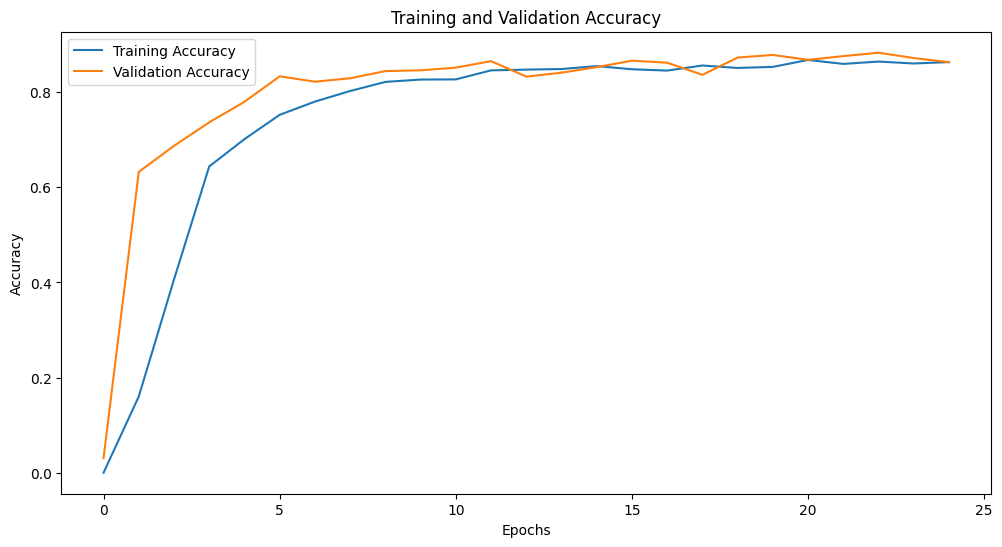

In [ ]:
history_dict = history.history
import matplotlib.pyplot as plt
# Training and validation accuracy
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']  # Use 'val_


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.show()

# Grad cam

In [ ]:
from tensorflow.keras.models import Model
import tensorflow as tf

def get_model_with_cam(cnn_model):
    last_conv_layer = cnn_model.get_layer("conv5_block3_out")
    model_with_cam = Model(inputs=cnn_model.input, outputs=[last_conv_layer.output, cnn_model.output])
    return model_with_cam

model_with_cam = get_model_with_cam(cnn_model)


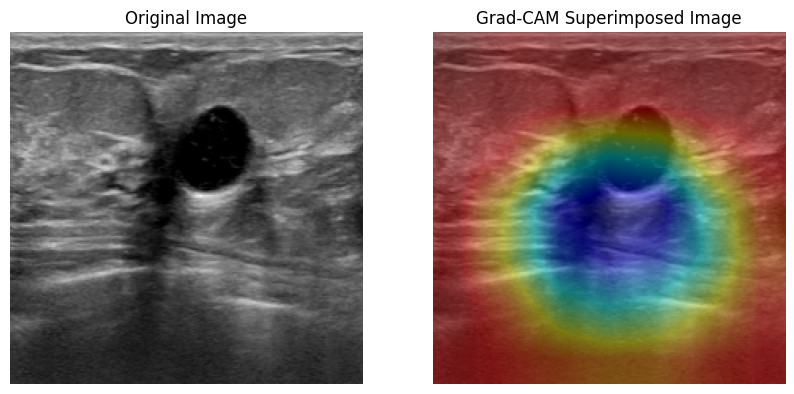

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_img_from_dataset(test_dataset, index=0):
    # Get the first batch from the dataset
    batch_img, batch_seq = next(iter(test_dataset))
    img = batch_img[index].numpy()
    return img, batch_seq[index].numpy()

img, caption_seq = get_img_from_dataset(test_dataset)
class_idx = np.argmax(caption_seq)
img_uint8 = tf.image.convert_image_dtype(img, tf.uint8).numpy()

def compute_gradcam(model, img_tensor, class_idx):
    grad_model = tf.keras.models.Model([model.input], [model.get_layer('conv5_block3_out').output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    casted_conv_outputs = tf.cast(conv_outputs > 0, "float32")
    casted_grads = tf.cast(grads > 0, "float32")
    guided_grads = casted_conv_outputs * casted_grads * grads

    conv_outputs = conv_outputs[0]
    guided_grads = guided_grads[0]

    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

    cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    return heatmap

img_tensor = tf.expand_dims(img, axis=0)  # Add batch dimension
heatmap = compute_gradcam(cnn_model, img_tensor, class_idx)

# Overlay heatmap on the image
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_uint8, 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_uint8)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title("Grad-CAM Superimposed Image")
plt.axis('off')

plt.show()


# Check sample predictions

In [ ]:
import random
vocab = vectorization.get_vocabulary()
index_lookup = dict(zip(range(len(vocab)), vocab))
max_decoded_sentence_length = SEQ_LENGTH - 1
test_images = list(test_data.keys())
test_images_captions = list(test_data.values())

def generate_caption(i):
    sample_img=list(test_data.keys())[i]
    sample_original_caption= list(test_data.values())[i]
    sample_img = decode_and_resize(sample_img)
    img = sample_img.numpy().clip(0, 255).astype(np.uint8)
    img = tf.expand_dims(sample_img, 0)
    img = caption_model.cnn_model(img)

    encoded_img = caption_model.encoder(img, training=False)
    decoded_caption = "<start> "
    for i in range(max_decoded_sentence_length):
        tokenized_caption = vectorization([decoded_caption])[:, :-1]
        mask = tf.math.not_equal(tokenized_caption, 0)
        predictions = caption_model.decoder(
            tokenized_caption, encoded_img, training=False, mask=mask
        )
        sampled_token_index = np.argmax(predictions[0][0, i, :])
        sampled_token = index_lookup[sampled_token_index]
        if sampled_token == "<end>":
            break
        decoded_caption += " " + sampled_token
    print("Predicted Caption: ", decoded_caption)
    print('Actual Caption:',sample_original_caption )

generate_caption(4)
generate_caption(10)


Predicted Caption:  <start>  the tissue composition is heterogeneous predominantly fat with a shape described as irregular and interpretation suspicion of malignancy.
Actual Caption: <start> The tissue composition is homogeneous: fibroglandular with a shape described as round,  and interpretation : Suspicion of malignancy&Intraductal papilloma. <end>
Predicted Caption:  <start>  the tissue composition is heterogeneous predominantly fat with a shape described as irregular and interpretation suspicion of malignancy.
Actual Caption: <start> The tissue composition is heterogeneous: predominantly fat with a shape described as oval,  and interpretation : Suspicion of malignancy&Fibroadenoma&Intraductal papilloma. <end>


In [ ]:
t_1=[]
for i in range(0,len(list(test_data))-1):
        sample_img=list(test_data.keys())[i]
        sample_original_caption= list(test_data.values())[i]
        t_1.append(sample_original_caption)

In [ ]:
predicted_t=[]
actual_t= []
for i in range(0,10):
    sample_img=list(test_data.keys())[i]
    sample_original_caption= list(test_data.values())[i]
    actual_t.append(sample_original_caption)
    # Read the image from the disk
    sample_img = decode_and_resize(sample_img)
    img = sample_img.numpy().clip(0, 255).astype(np.uint8)

    # Pass the image to the CNN
    img = tf.expand_dims(sample_img, 0)
    img = caption_model.cnn_model(img)

    # Pass the image features to the Transformer encoder
    encoded_img = caption_model.encoder(img, training=False)

    # Generate the caption using the Transformer decoder
    decoded_caption = "<start> "
    for i in range(max_decoded_sentence_length):
        tokenized_caption = vectorization([decoded_caption])[:, :-1]
        mask = tf.math.not_equal(tokenized_caption, 0)
        predictions = caption_model.decoder(
            tokenized_caption, encoded_img, training=False, mask=mask
        )
        sampled_token_index = np.argmax(predictions[0][0, i, :])
        sampled_token = index_lookup[sampled_token_index]
        if sampled_token == "<end>":
            break
        decoded_caption += " " + sampled_token
    predicted_t.append(decoded_caption)

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
print(f"{'BLEU-1 score':<20}{'BLEU-2 score':<20}{'BLEU-3 score':<20}{'BLEU-4 score':<20}")
for i in range(0,5):
    reference = [actual_t[i][0].split()]
    candidate = predicted_t[i].split()
    bleu1_score = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
    bleu2_score = sentence_bleu(reference, candidate, weights=(0.5, .5, 0, 0))
    bleu3_score = sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0))
    bleu4_score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, .25))
    print(f"{bleu1_score:<20}{bleu2_score:<20}{bleu3_score:<20}{bleu4_score:<20}")

# Attention Heat Map

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

attention_layer_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('attention_layer').output)

image = np.expand_dims(test_images[0], axis=0)
attention_output = attention_layer_model.predict(image)

attention_weights = np.mean(attention_output, axis=-1)  # Resulting shape should be (224, 224)

attention_weights -= np.min(attention_weights)
attention_weights /= np.max(attention_weights)
attention_map_resized = tf.image.resize(attention_weights[..., np.newaxis], (IMAGE_SIZE[0], IMAGE_SIZE[1]))
attention_map_resized = tf.squeeze(attention_map_resized).numpy()

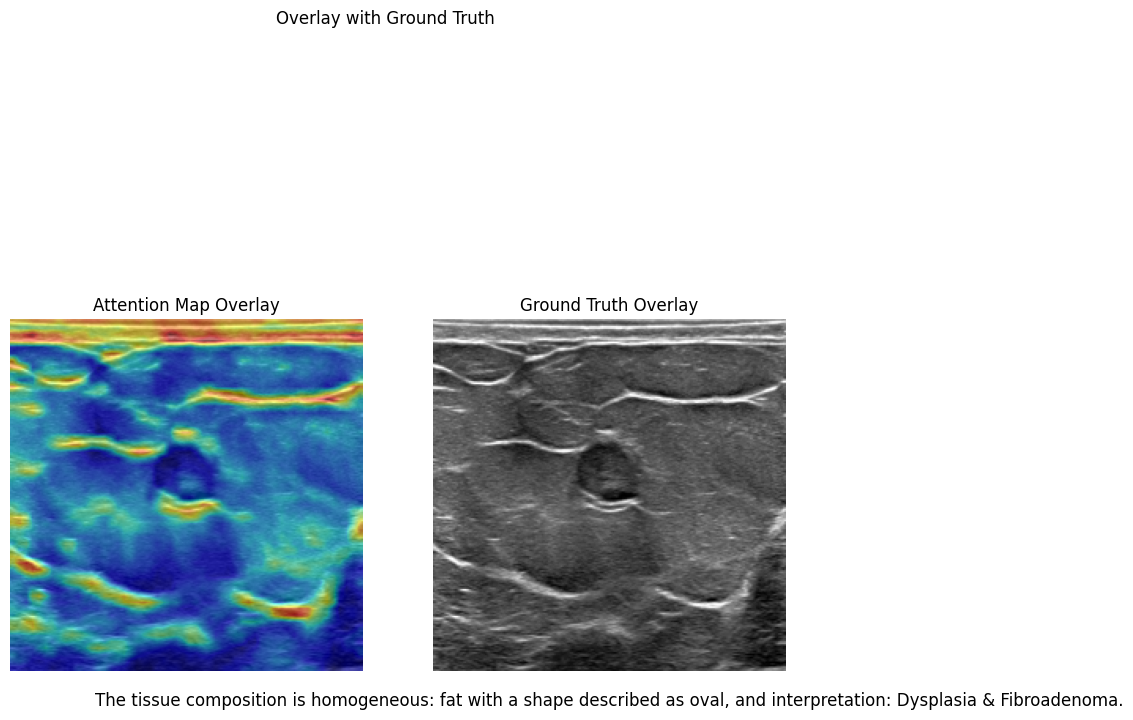

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_with_ground_truth(original_image, attention_map, ground_truth_text=None, ground_truth_mask=None, title="Overlay with Ground Truth"):
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(tf.squeeze(original_image), cmap='gray')
    plt.imshow(attention_map, cmap='jet', alpha=0.5)
    plt.title("Attention Map Overlay")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(original_image), cmap='gray')

    if ground_truth_mask is not None:
        plt.contour(ground_truth_mask.squeeze(), colors='red', linewidths=2)

    if ground_truth_text is not None:
        plt.text(0.5, -0.1, ground_truth_text, fontsize=12, ha='center', transform=plt.gca().transAxes)

    plt.title("Ground Truth Overlay")
    plt.axis('off')

    plt.suptitle(title)
    plt.show()

ground_truth_text = 'The tissue composition is homogeneous: fat with a shape described as oval, and interpretation: Dysplasia & Fibroadenoma.'
plot_with_ground_truth(test_images[0], attention_map_resized, ground_truth_text=ground_truth_text)



In [ ]:
pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/project_Brintha.ipynb


[NbConvertApp] Converting notebook /content/project_Brintha.ipynb to html
[NbConvertApp] Writing 3692234 bytes to /content/project_Brintha.html
